In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



Датасет можно найти по ссылке ниже

из трех датасетов выбран этот: Range-Queries-Aggregates

Описание датасета:

Example of a Range Query with Count, SUM, and AVG:

[1159191.2534425869,1894755.9479944962,5225.375665408865,2981.728430851036,96046.0,34927.0,1111.618901359765]

where:
'X-coordinate' = 1159191.2534425869,
'Y-coordinate' = 1894755.9479944962,
'X-range' = 5225.375665408865,
'Y-range' = 2981.728430851036,
'Count' = 96046.0,
'SUM' = 34927,
'AVG' = 1111.618901359765.

https://archive.ics.uci.edu/ml/datasets/Query+Analytics+Workloads+Dataset

In [3]:
rad = pd.read_csv('Range-Queries-Aggregates.csv', sep=',')

In [4]:
rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
Unnamed: 0    200000 non-null int64
x             200000 non-null float64
y             200000 non-null float64
x_range       200000 non-null float64
y_range       200000 non-null float64
count         200000 non-null float64
sum_          200000 non-null float64
avg           199843 non-null float64
dtypes: float64(7), int64(1)
memory usage: 12.2 MB


In [5]:
rad.describe()

,Unnamed: 0,x,y,x_range,y_range,count,sum_,avg
count,200000.00000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,199843.000000
mean,124902.68317,1.162689e+06,1.889317e+06,4041.768707,7849.787407,159552.880645,47932.136765,1042.686630
std,72117.68729,8.273936e+03,1.348394e+04,2335.065977,4536.593145,154476.041786,47947.591946,268.731396
min,0.00000,1.149843e+06,1.862018e+06,0.010886,0.021822,0.000000,0.000000,131.571579
25%,62466.25000,1.157427e+06,1.878072e+06,2019.044862,3915.618892,38602.500000,10927.000000,887.068938
50%,124921.50000,1.159591e+06,1.884029e+06,4041.271140,7851.543057,110457.500000,32163.000000,954.789512
75%,187243.25000,1.162272e+06,1.900768e+06,6064.163410,11784.260257,237844.750000,71534.000000,1258.980480
max,249999.00000,1.185386e+06,1.923187e+06,8090.420673,15704.276908,985284.000000,347441.000000,2249.718880


In [6]:
rad.head()

,Unnamed: 0,x,y,x_range,y_range,count,sum_,avg
0,0,1.159191e+06,1.894756e+06,5225.375665,2981.728431,96046.0,34927.0,1111.618901
1,1,1.159293e+06,1.898922e+06,3499.176007,6879.352245,152668.0,54847.0,1192.855949
2,3,1.160321e+06,1.903776e+06,6495.796780,854.898277,22297.0,5082.0,1260.094676
3,5,1.159843e+06,1.904821e+06,1376.380800,10049.534031,99570.0,28239.0,1311.296003
4,6,1.161389e+06,1.899015e+06,4047.408899,7855.346749,161713.0,48617.0,1218.767774


In [7]:
features = [ 'Unnamed: 0',
            'x',                 
            'y',            
            'x_range',           
            'y_range',                       
            'count',    
            'sum_'  ,                 
           ]
response='avg'  

In [8]:
X = rad[features]

In [9]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

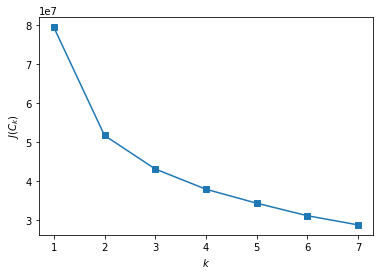

In [10]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [16]:
clusterer = KMeans (n_clusters=3)
preds = clusterer.fit_predict(X)
score = silhouette_score (X, preds)
print ("silhouette score is {})".format( score))

silhouette score is 0.4293805558085281)


Wall time: 1h 9min 17s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

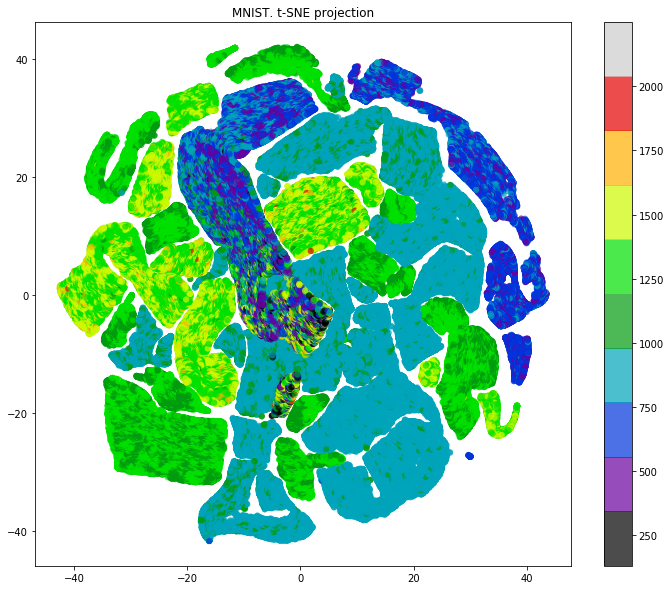

In [41]:
%%time

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics



from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');


Вывод: Получен оптимальное количество кластеров для метода k-ближайших. Очень важно железо компьютера, остальные методы кластеризации выдавали ошибку памяти.